In [1]:
# import libraries
import matplotlib.pyplot as plt
import seaborn as sn
import pandas as pd
import numpy as np

In [2]:
# Add the parent directory to the system path 
import os
import sys
sys.path.append(os.path.abspath(os.path.join('..')))

In [3]:
from scripts.data_processing import *


In [4]:
# Load the data 
df = pd.read_csv('../data/cleaned_telecom_data.csv', index_col=None)

In [5]:
df.head()

Bearer Id                Start  Start ms                  End  End ms  \
0  1.311448e+19  2019-04-04 12:01:00     770.0  2019-04-25 14:35:00   662.0   
1  1.311448e+19  2019-04-09 13:04:00     235.0  2019-04-25 08:15:00   606.0   
2  1.311448e+19  2019-04-09 17:42:00       1.0  2019-04-25 11:58:00   652.0   
3  1.311448e+19  2019-04-10 00:31:00     486.0  2019-04-25 07:36:00   171.0   
4  1.311448e+19  2019-04-12 20:10:00     565.0  2019-04-25 10:40:00   954.0   

   Dur. (ms)          IMSI  MSISDN/Number          IMEI  \
0   244912.0  2.082014e+14   3.366496e+10  3.552121e+13   
1   244912.0  2.082019e+14   3.368185e+10  3.579401e+13   
2   244912.0  2.082008e+14   3.373456e+10  3.528151e+13   
3   244912.0  2.082014e+14   3.373456e+10  3.535661e+13   
4   244912.0  2.082014e+14   3.369980e+10  3.540701e+13   

      Last Location Name  ...  Youtube DL (Bytes)  Youtube UL (Bytes)  \
0  9.16456699548519E+015  ...          15854611.0           2501332.0   
1                L77566A  ...          20247395.0          19111729.0   
2                D42335A  ...          19725661.0          14699576.0   
3                T21824A  ...          21388122.0          15146643.0   
4                D88865A  ...          15259380.0          18962873.0   

   Netflix DL (Bytes)  Netflix UL (Bytes)  Gaming DL (Bytes)  \
0           8198936.0           9656251.0        278082303.0   
1          18338413.0          17227132.0        608750074.0   
2          17587794.0           6163408.0        229584621.0   
3          13994646.0           1097942.0        799538153.0   
4          17124581.0            415218.0        527707248.0   

   Gaming UL (Bytes)  Other DL (Bytes)  Other UL (Bytes)  Total UL (Bytes)  \
0         14344150.0       171744450.0         8814393.0        36749741.0   
1          1170709.0       526904238.0        15055145.0        53800391.0   
2           395630.0       410692588.0         4215763.0        27883638.0   
3         10849722.0       749039933.0        12797283.0        43324218.0   
4          3529801.0       550709500.0        13910322.0        38542814.0   

   Total DL (Bytes)  
0       308879636.0  
1       653384965.0  
2       279807335.0  
3       846028530.0  
4       569138589.0  

[5 rows x 55 columns]

In [6]:
# tellco data field descriptions
df_field_desc = pd.read_excel("../data/Field Descriptions.xlsx")

df_field_desc

Fields  \
0                                  bearer id   
1                                  Dur. (ms)   
2                                      Start   
3                                   Start ms   
4                                        End   
5                                     End ms   
6                                   Dur. (s)   
7                                       IMSI   
8                              MSISDN/Number   
9                                       IMEI   
10                        Last Location Name   
11                           Avg RTT DL (ms)   
12                           Avg RTT UL (ms)   
13                   Avg Bearer TP DL (kbps)   
14                   Avg Bearer TP UL (kbps)   
15               TCP DL Retrans. Vol (Bytes)   
16               TCP UL Retrans. Vol (Bytes)   
17                       DL TP < 50 Kbps (%)   
18            50 Kbps < DL TP < 250 Kbps (%)   
19             250 Kbps < DL TP < 1 Mbps (%)   
20                        DL TP > 1 Mbps (%)   
21                       UL TP < 10 Kbps (%)   
22             10 Kbps < UL TP < 50 Kbps (%)   
23            50 Kbps < UL TP < 300 Kbps (%)   
24                      UL TP > 300 Kbps (%)   
25                           HTTP DL (Bytes)   
26                           HTTP UL (Bytes)   
27                 Activity Duration DL (ms)   
28                 Activity Duration UL (ms)   
29                               Dur. (ms).1   
30                      Handset Manufacturer   
31                              Handset Type   
32           Nb of sec with 125000B < Vol DL   
33     Nb of sec with 1250B < Vol UL < 6250B   
34  Nb of sec with 31250B < Vol DL < 125000B   
35            Nb of sec with 37500B < Vol UL   
36    Nb of sec with 6250B < Vol DL < 31250B   
37    Nb of sec with 6250B < Vol UL < 37500B   
38             Nb of sec with Vol DL < 6250B   
39             Nb of sec with Vol UL < 1250B   
40                   Social Media DL (Bytes)   
41                   Social Media UL (Bytes)   
42                        YouTube DL (Bytes)   
43                        YouTube UL (Bytes)   
44                        Netflix DL (Bytes)   
45                        Netflix UL (Bytes)   
46                         Google DL (Bytes)   
47                         Google UL (Bytes)   
48                          Email DL (Bytes)   
49                          Email UL (Bytes)   
50                         Gaming DL (Bytes)   
51                         Gaming UL (Bytes)   
52                                  Other DL   
53                                  Other UL   
54                          Total DL (Bytes)   
55                          Total UL (Bytes)   

                                          Description  
0                              xDr session identifier  
1                   Total Duration of the xDR (in ms)  
2       Start time of the xDR (first frame timestamp)  
3   Milliseconds offset of start time for the xDR ...  
4          End time of the xDR (last frame timestamp)  
5   Milliseconds offset of end time of the xDR (la...  
6                    Total Duration of the xDR (in s)  
7            International Mobile Subscriber Identity  
8   MS International PSTN/ISDN Number of mobile - ...  
9             International Mobile Equipment Identity  
10  User location call name (2G/3G/4G) at the end ...  
11  Average Round Trip Time measurement Downlink d...  
12  Average Round Trip Time measurement Uplink dir...  
13  Average Bearer Throughput for Downlink (kbps) ...  
14  Average Bearer Throughput for uplink (kbps) - ...  
15  TCP volume of Downlink packets detected as ret...  
16  TCP volume of Uplink packets detected as retra...  
17  Duration ratio when Bearer Downlink Throughput...  
18  Duration ratio when Bearer Downlink Throughput...  
19  Duration ratio when Bearer Downlink Throughput...  
20  Duration ratio when Bearer Downlink Throughput...  
21  Duration ratio when Bearer Uplink Throughput < ….  
22  Duration 

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150001 entries, 0 to 150000
Data columns (total 55 columns):
 #   Column                                    Non-Null Count   Dtype  
---  ------                                    --------------   -----  
 0   Bearer Id                                 150001 non-null  float64
 1   Start                                     150000 non-null  object 
 2   Start ms                                  150001 non-null  float64
 3   End                                       150000 non-null  object 
 4   End ms                                    150001 non-null  float64
 5   Dur. (ms)                                 150001 non-null  float64
 6   IMSI                                      150001 non-null  float64
 7   MSISDN/Number                             150001 non-null  float64
 8   IMEI                                      150001 non-null  float64
 9   Last Location Name                        150001 non-null  object 
 10  Avg RTT DL (ms)     

In [8]:
# descriptive stastics
df.describe()

Bearer Id       Start ms         End ms      Dur. (ms)  \
count  1.500010e+05  150001.000000  150001.000000  150001.000000   
mean   1.013887e+19     499.188200     498.800880   99572.128983   
std    2.883600e+18     288.610872     288.096693   59084.184127   
min    6.917538e+18       0.000000       0.000000    7142.000000   
25%    7.349883e+18     250.000000     251.000000   57442.000000   
50%    7.349883e+18     499.000000     500.000000   86399.000000   
75%    1.304243e+19     749.000000     750.000000  132430.000000   
max    1.318654e+19     999.000000     999.000000  244912.000000   

               IMSI  MSISDN/Number          IMEI  Avg RTT DL (ms)  \
count  1.500010e+05   1.500010e+05  1.500010e+05    150001.000000   
mean   2.082015e+14   3.366999e+10  4.847455e+13        72.862020   
std    3.925668e+08   3.532589e+07  2.237359e+13        51.361714   
min    2.082008e+14   3.360168e+10  4.400152e+11         0.000000   
25%    2.082014e+14   3.365151e+10  3.546261e+13        35.000000   
50%    2.082015e+14   3.366380e+10  3.572241e+13        54.000000   
75%    2.082018e+14   3.368473e+10  8.611970e+13       109.795706   
max    2.082023e+14   3.373456e+10  9.900120e+13       221.989265   

       Avg RTT UL (ms)  Avg Bearer TP DL (kbps)  ...  Youtube DL (Bytes)  \
count    150001.000000            150001.000000  ...        1.500010e+05   
mean         12.037797             11112.355328  ...        1.163407e+07   
std          11.040917             17189.349903  ...        6.710569e+06   
min           0.000000                 0.000000  ...        5.300000e+01   
25%           3.000000                43.000000  ...        5.833501e+06   
50%           7.000000                63.000000  ...        1.161602e+07   
75%          17.662883             19710.000000  ...        1.744852e+07   
max          39.657207             49210.500000  ...        2.325910e+07   

       Youtube UL (Bytes)  Netflix DL (Bytes)  Netflix UL (Bytes)  \
count        1.500010e+05        1.500010e+05        1.500010e+05   
mean         1.100941e+07        1.162685e+07        1.100175e+07   
std          6.345423e+06        6.725218e+06        6.359490e+06   
min          1.050000e+02        4.200000e+01        3.500000e+01   
25%          5.517965e+06        5.777156e+06        5.475981e+06   
50%          1.101345e+07        1.164222e+07        1.099638e+07   
75%          1.651556e+07        1.747048e+07        1.650727e+07   
max          2.201196e+07        2.325919e+07        2.201196e+07   

       Gaming DL (Bytes)  Gaming UL (Bytes)  Other DL (Bytes)  \
count       1.500010e+05       1.500010e+05      1.500010e+05   
mean        4.220447e+08       8.288398e+06      4.211005e+08   
std         2.439675e+08       4.782700e+06      2.432050e+08   
min         2.516000e+03       5.900000e+01      3.290000e+03   
25%         2.104733e+08       4.128476e+06      2.101869e+08   
50%         4.234081e+08       8.291208e+06      4.218030e+08   
75%         6.331742e+08       1.243162e+07      6.316918e+08   
max         8.434419e+08       1.655879e+07      8.434425e+08   

       Other UL (Bytes)  Total UL (Bytes)  Total DL (Bytes)  
count      1.500010e+05      1.500010e+05      1.500010e+05  
mean       8.264799e+06      4.112120e+07      4.546434e+08  
std        4.769004e+06      1.126923e+07      2.441421e+08  
min        1.480000e+02      9.503716e+06      7.114041e+06  
25%        4.145943e+06      3.322203e+07      2.431072e+08  
50%        8.267071e+06      4.114324e+07      4.558409e+08  
75%        1.238415e+07      4.903424e+07      6.657051e+08  
max        1.655882e+07      7.275255e+07      9.029696e+08  

[8 rows x 50 columns]

In [9]:
# check for missing values 
df.isnull().sum()

Bearer Id                                   0
Start                                       1
Start ms                                    0
End                                         1
End ms                                      0
Dur. (ms)                                   0
IMSI                                        0
MSISDN/Number                               0
IMEI                                        0
Last Location Name                          0
Avg RTT DL (ms)                             0
Avg RTT UL (ms)                             0
Avg Bearer TP DL (kbps)                     0
Avg Bearer TP UL (kbps)                     0
TCP DL Retrans. Vol (Bytes)                 0
TCP UL Retrans. Vol (Bytes)                 0
DL TP < 50 Kbps (%)                         0
50 Kbps < DL TP < 250 Kbps (%)              0
250 Kbps < DL TP < 1 Mbps (%)               0
DL TP > 1 Mbps (%)                          0
UL TP < 10 Kbps (%)                         0
10 Kbps < UL TP < 50 Kbps (%)     

### Top 10 handsets used by the customers.

In [10]:
#  Top 10 handsets
top_10_handsets = get_top_handsets(df)
print("Top 10 handsets used by the customers:")
print(top_10_handsets)

Top 10 handsets used by the customers:
Handset Type
Huawei B528S-23A                20324
Apple iPhone 6S (A1688)          9419
Apple iPhone 6 (A1586)           9023
undefined                        8987
Apple iPhone 7 (A1778)           6326
Apple iPhone Se (A1723)          5187
Apple iPhone 8 (A1905)           4993
Apple iPhone Xr (A2105)          4568
Samsung Galaxy S8 (Sm-G950F)     4520
Apple iPhone X (A1901)           3813
Name: count, dtype: int64


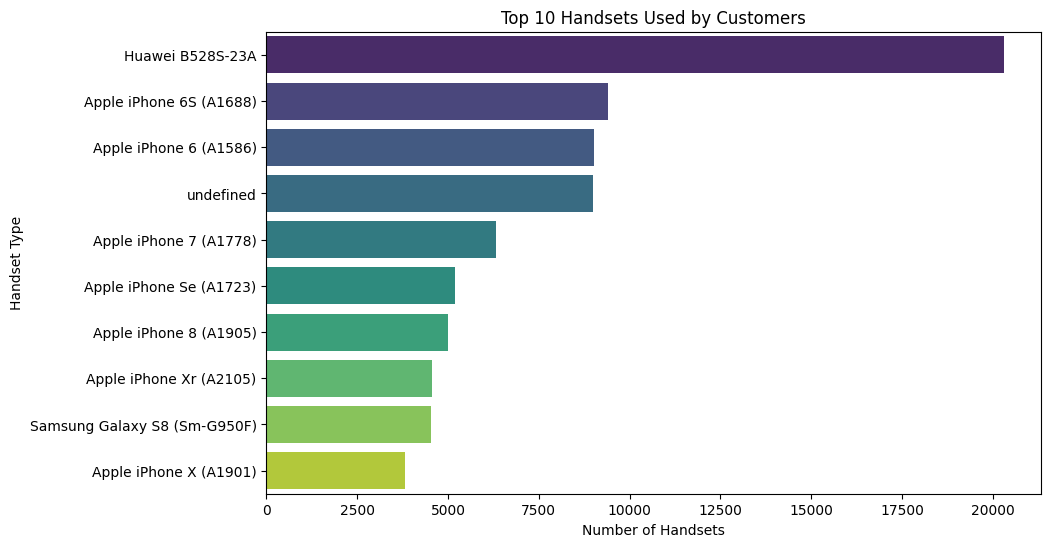

In [11]:
# Plot for top 10 handsets used by customers
plt.figure(figsize=(10, 6))
sns.barplot(x=top_10_handsets.values, y=top_10_handsets.index, hue=top_10_handsets.index, palette='viridis', legend=False)
plt.title('Top 10 Handsets Used by Customers')
plt.xlabel('Number of Handsets')
plt.ylabel('Handset Type')
plt.show()

### top 3 handset manufacturers


Top 3 handset manufacturers:
Handset Manufacturer
Apple      60137
Samsung    40839
Huawei     34423
Name: count, dtype: int64


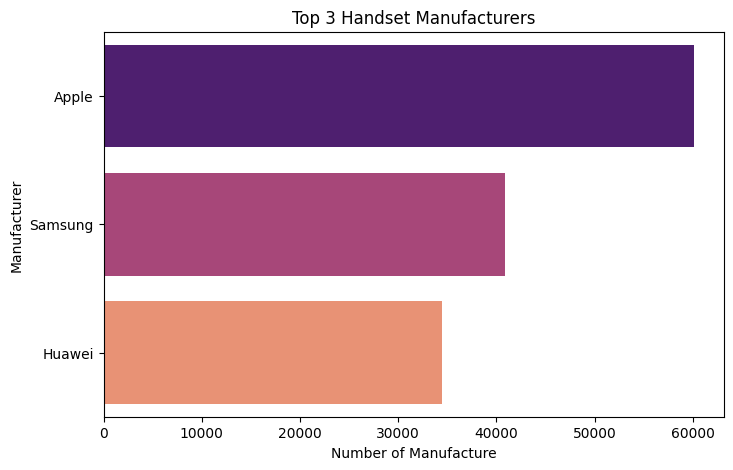

In [12]:
#  Top 3 handset manufacturers
top_3_manufacturers = get_top_manufacturers(df)
print("\nTop 3 handset manufacturers:")
print(top_3_manufacturers)

# Plotting the bar plot for top 3 manufacturers
plt.figure(figsize=(8, 5))
sns.barplot(x=top_3_manufacturers.values, y=top_3_manufacturers.index, hue=top_3_manufacturers.index, palette='magma', legend=False)
plt.title('Top 3 Handset Manufacturers')
plt.xlabel('Number of Manufacture')
plt.ylabel('Manufacturer')
plt.show()

### top 5 handsets per top 3 handset manufacturer

In [13]:
#  Top 5 handsets per top 3 manufacturers
top_5_handsets_per_manufacturer = get_top_handsets_per_manufacturer(df, top_3_manufacturers.index)
print("\nTop 5 handsets per top 3 manufacturers:")
for manufacturer, handsets in top_5_handsets_per_manufacturer.items():
    print(f"\n{manufacturer}:")
    print(handsets)


Top 5 handsets per top 3 manufacturers:

Apple:
Handset Type
Apple iPhone 6S (A1688)    9419
Apple iPhone 6 (A1586)     9023
Apple iPhone 7 (A1778)     6326
Apple iPhone Se (A1723)    5187
Apple iPhone 8 (A1905)     4993
Name: count, dtype: int64

Samsung:
Handset Type
Samsung Galaxy S8 (Sm-G950F)    4520
Samsung Galaxy A5 Sm-A520F      3724
Samsung Galaxy J5 (Sm-J530)     3696
Samsung Galaxy J3 (Sm-J330)     3484
Samsung Galaxy S7 (Sm-G930X)    3199
Name: count, dtype: int64

Huawei:
Handset Type
Huawei B528S-23A                  19752
Huawei E5180                       2079
Huawei P20 Lite Huawei Nova 3E     2021
Huawei P20                         1480
Huawei Y6 2018                      997
Name: count, dtype: int64


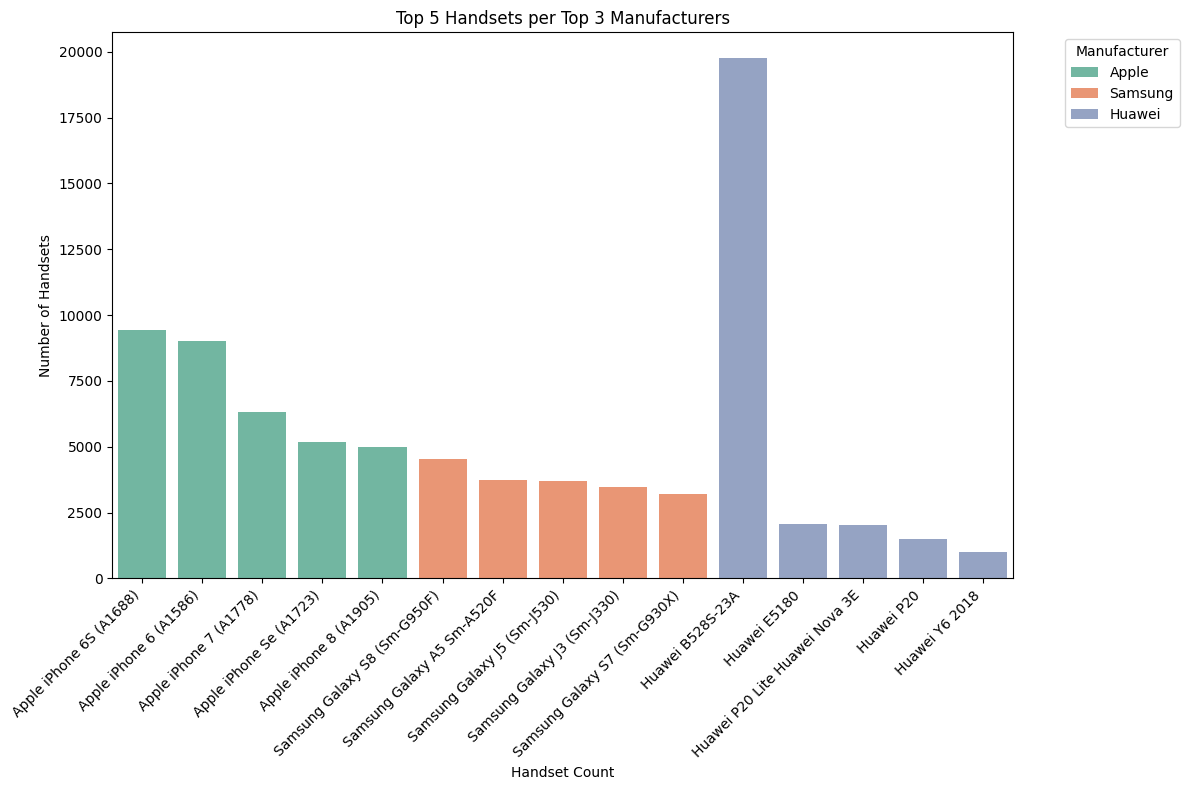

In [14]:
#  Plot for Top 5 handsets per top 3 manufacturers

# Prepare the data for plotting
plot_data = []
for manufacturer, handsets in top_5_handsets_per_manufacturer.items():
    for handset, count in handsets.items():
        plot_data.append([manufacturer, handset, count])

# Convert the data into a pandas DataFrame
df_plot = pd.DataFrame(plot_data, columns=['Manufacturer', 'Handset', 'Count'])

# Plotting
plt.figure(figsize=(12, 8))
sns.barplot(x='Handset', y='Count', hue='Manufacturer', data=df_plot, palette='Set2')

plt.title('Top 5 Handsets per Top 3 Manufacturers')
plt.xlabel('Handset Count')
plt.ylabel('Number of Handsets')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Manufacturer', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

### 4.  Interpretation and Recommendation
Based on the analysis of handset usage, we recommend focusing marketing efforts on the top 3 manufacturers and their most popular models. 
This approach will target the largest customer segments efficiently.

## Task 1.1: User Behavior Overview
Aggregated per user the following information in the column
  - number of xDR sessions
  - Session duration
  - the total download (DL) and upload (UL) data
  - the total data volume (in Bytes) during this session for each application

In [15]:
# Aggregate user behavior
user_behavior = aggregate_user_behavior(df)
print("\nUser Behavior Overview (first 5 rows):")
user_behavior


User Behavior Overview (first 5 rows):


number_of_xDR_sessions  session_duration      total_DL  \
MSISDN/Number                                                           
3.360168e+10                      359      3.411218e+07  1.682756e+11   
3.360171e+10                        1      3.850300e+04  2.934050e+08   
3.360171e+10                        1      5.247800e+04  8.621012e+08   
3.360171e+10                        2      1.202980e+05  1.498037e+09   
3.360171e+10                        1      1.760220e+05  1.333844e+08   
...                               ...               ...           ...   
3.370000e+10                        1      1.716720e+05  7.784317e+08   
3.370000e+10                        1      9.498000e+03  5.465595e+08   
3.370000e+10                        1      6.604500e+04  4.484382e+08   
3.370000e+10                        1      2.142090e+05  3.530826e+08   
3.373456e+10                    24383      2.433741e+09  1.102166e+13   

                   total_UL  total_data_volume  Social Media_data  \
MSISDN/Number                                                       
3.360168e+10   1.467565e+10       1.829512e+11       6.654877e+08   
3.360171e+10   4.621197e+07       3.396170e+08       6.024740e+05   
3.360171e+10   3.850972e+07       9.006109e+08       3.036290e+06   
3.360171e+10   8.929984e+07       1.587337e+09       4.208402e+06   
3.360171e+10   4.494626e+07       1.783307e+08       2.489630e+06   
...                     ...                ...                ...   
3.370000e+10   4.898112e+07       8.274129e+08       1.525544e+06   
3.370000e+10   3.784142e+07       5.844009e+08       7.876170e+05   
3.370000e+10   3.262826e+07       4.810664e+08       1.279316e+06   
3.370000e+10   4.167086e+07       3.947535e+08       3.432270e+05   
3.373456e+10   1.003051e+12       1.202471e+13       4.468294e+10   

                Google_data    Email_data  Youtube_data  Netflix_data  \
MSISDN/Number                                                           
3.360168e+10   2.833355e+09  8.184238e+08  7.948124e+09  8.047787e+09   
3.360171e+10   1.344705e+07  2.835412e+06  2.541454e+07  1.247894e+07   
3.360171e+10   4.379917e+06  3.596083e+06  1.651515e+07  1.695188e+07   
3.360171e+10   2.115202e+07  3.285166e+06  6.737252e+07  5.976138e+07   
3.360171e+10   1.309218e+07  3.264827e+06  2.297488e+07  2.487300e+07   
...                     ...           ...           ...           ...   
3.370000e+10   2.922475e+06  2.813157e+06  3.683251e+07  2.290728e+07   
3.370000e+10   1.135828e+07  1.032177e+06  3.097622e+07  2.133642e+07   
3.370000e+10   1.037474e+07  1.396652e+06  1.885044e+07  2.257492e+07   
3.370000e+10   1.012454e+07  1.664834e+06  2.582723e+07  8.718765e+06   
3.373456e+10   1.903870e+11  5.523858e+10  5.540751e+11  5.532141e+11   

                Gaming_data    Other_data  
MSISDN/Number                              
3.360168e+10   1.597187e+11  1.588765e+11  
3.360171e+10   2.830953e+08  7.861759e+08  
3.360171e+10   8.397950e+08  6.824854e+08  
3.360171e+10   1.423399e+09  1.326389e+09  
3.360171e+10   1.102870e+08  8.259411e+07  
...                     ...           ...  
3.370000e+10   7.541783e+08  2.930375e+08  
3.370000e+10   5.098622e+08  4.314203e+08  
3.370000e+10   4.226600e+08  3.962178e+08  
3.370000e+10   3.324118e+08  8.492620e+07  
3.373456e+10   1.042554e+13  1.050403e+13  

[90038 rows x 12 columns]

In [16]:
# Descriptive statistics of user behavior
print("\nDescriptive statistics of user behavior:")
print(user_behavior.describe())


Descriptive statistics of user behavior:
       number_of_xDR_sessions  session_duration      total_DL      total_UL  \
count            90038.000000      9.003800e+04  9.003800e+04  9.003800e+04   
mean                 1.665974      1.658846e+05  7.574243e+08  6.850687e+07   
std                 81.267557      8.112136e+06  3.673617e+10  3.343148e+09   
min                  1.000000      7.146000e+03  9.046209e+06  9.503716e+06   
25%                  1.000000      7.007000e+04  3.148955e+08  3.641345e+07   
50%                  1.000000      1.020740e+05  5.709107e+08  4.680074e+07   
75%                  2.000000      1.727990e+05  8.069726e+08  6.558001e+07   
max              24383.000000      2.433741e+09  1.102166e+13  1.003051e+12   

       total_data_volume  Social Media_data   Google_data    Email_data  \
count       9.003800e+04       9.003800e+04  9.003800e+04  9.003800e+04   
mean        8.259312e+08       3.045818e+06  1.300675e+07  3.763607e+06   
std         4.007920e

### Task 1.2: Exploratory Data Analysis

In [17]:
# 2. Describe relevant variables and data types
print("\nDescribing variables and data types:")
variables_description = describe_variables(df)
display(variables_description)


Describing variables and data types:


Data Type  Non-Null Count  \
Bearer Id                                  float64          150001   
Start                                       object          150000   
Start ms                                   float64          150001   
End                                         object          150000   
End ms                                     float64          150001   
Dur. (ms)                                  float64          150001   
IMSI                                       float64          150001   
MSISDN/Number                              float64          150001   
IMEI                                       float64          150001   
Last Location Name                          object          150001   
Avg RTT DL (ms)                            float64          150001   
Avg RTT UL (ms)                            float64          150001   
Avg Bearer TP DL (kbps)                    float64          150001   
Avg Bearer TP UL (kbps)                    float64          150001   
TCP DL Retrans. Vol (Bytes)                float64          150001   
TCP UL Retrans. Vol (Bytes)                float64          150001   
DL TP < 50 Kbps (%)                        float64          150001   
50 Kbps < DL TP < 250 Kbps (%)             float64          150001   
250 Kbps < DL TP < 1 Mbps (%)              float64          150001   
DL TP > 1 Mbps (%)                         float64          150001   
UL TP < 10 Kbps (%)                        float64          150001   
10 Kbps < UL TP < 50 Kbps (%)              float64          150001   
50 Kbps < UL TP < 300 Kbps (%)             float64          150001   
UL TP > 300 Kbps (%)                       float64          150001   
HTTP DL (Bytes)                            float64          150001   
HTTP UL (Bytes)                            float64          150001   
Activity Duration DL (ms)                  float64          150001   
Activity Duration UL (ms)                  float64          150001   
Dur. (ms).1                                float64          150001   
Handset Manufacturer                        object          150001   
Handset Type                                object          150001   
Nb of sec with 125000B < Vol DL            float64          150001   
Nb of sec with 1250B < Vol UL < 6250B      float64          150001   
Nb of sec with 31250B < Vol DL < 125000B   float64          150001   
Nb of sec with 37500B < Vol UL             float64          150001   
Nb of sec with 6250B < Vol DL < 31250B     float64          150001   
Nb of sec with 6250B < Vol UL < 37500B     float64          150001   
Nb of sec with Vol DL < 6250B              float64          150001   
Nb of sec with Vol UL < 1250B              float64          150001   
Social Media DL (Bytes)                    float64          150001   
Social Media UL (Bytes)                    float64          150001   
Google DL (Bytes)                          float64          150001   
Google UL (Bytes)                          float64          150001   
Email DL (Bytes)                           float64          150001   
Email UL (Bytes)                           float64          150001   
Youtube DL (Bytes)                         float64          150001   
Youtube UL (Bytes)                         float64          150001   
Netflix DL (Bytes)                         float64          150001   
Netflix UL (Bytes)                         float64          150001   
Gaming DL (Bytes)                          float64          150001   
Gaming UL (Bytes)                          float64          150001   
Other DL (Bytes)                           float64          150001   
Other UL (Bytes)                           float64          150001   
Total UL (Bytes)                           float64          150001   
Total DL (Bytes)                           float64          150001   

                                          Null Count  Unique Values  
Bearer Id                                         

Variable transformations – segment the users into the top five decile
classes based on the total duration for all sessions and compute the total
data (DL+UL) per decile class.

In [18]:
# 3. Variable transformations - segment users and compute total data per decile class
print("\nSegmenting users and computing total data per decile class:")
decile_data = segment_users(user_behavior)
decile_data.head()


Segmenting users and computing total data per decile class:


decile_class    total_data
0             0  9.710840e+12
1             1  1.075465e+13
2             2  9.613778e+12
3             3  1.171941e+13
4             4  3.256651e+13

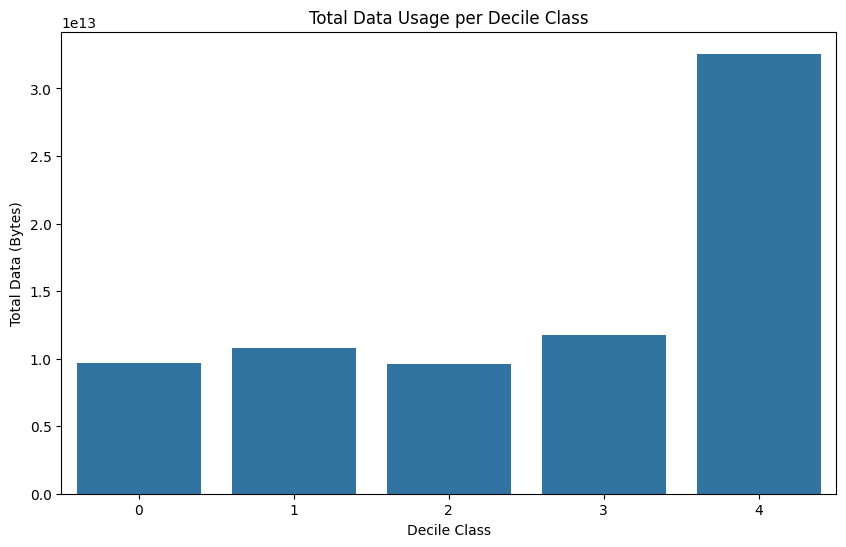


Interpretation of decile analysis:
1. The top decile class uses significantly more data than the others.
2. There's a clear trend of increasing data usage across decile classes.
3. This suggests a small portion of users account for a large portion of data usage.
4. Consider tailored plans or promotions for high-data users in the top deciles.


In [19]:
# Visualize total data per decile class
plt.figure(figsize=(10, 6))
sns.barplot(x='decile_class', y='total_data', data=decile_data)
plt.title('Total Data Usage per Decile Class')
plt.xlabel('Decile Class')
plt.ylabel('Total Data (Bytes)')
plt.show()

print("\nInterpretation of decile analysis:")
print("1. The top decile class uses significantly more data than the others.")
print("2. There's a clear trend of increasing data usage across decile classes.")
print("3. This suggests a small portion of users account for a large portion of data usage.")
print("4. Consider tailored plans or promotions for high-data users in the top deciles.")

In [20]:
# 4. Analyze basic metrics
print("\nAnalyzing basic metrics:")
basic_metrics = analyze_basic_metrics(df)
display(basic_metrics)


Analyzing basic metrics:


Bearer Id       Start ms         End ms      Dur. (ms)  \
count  1.500010e+05  150001.000000  150001.000000  150001.000000   
mean   1.013887e+19     499.188200     498.800880   99572.128983   
std    2.883600e+18     288.610872     288.096693   59084.184127   
min    6.917538e+18       0.000000       0.000000    7142.000000   
25%    7.349883e+18     250.000000     251.000000   57442.000000   
50%    7.349883e+18     499.000000     500.000000   86399.000000   
75%    1.304243e+19     749.000000     750.000000  132430.000000   
max    1.318654e+19     999.000000     999.000000  244912.000000   

               IMSI  MSISDN/Number          IMEI  Avg RTT DL (ms)  \
count  1.500010e+05   1.500010e+05  1.500010e+05    150001.000000   
mean   2.082015e+14   3.366999e+10  4.847455e+13        72.862020   
std    3.925668e+08   3.532589e+07  2.237359e+13        51.361714   
min    2.082008e+14   3.360168e+10  4.400152e+11         0.000000   
25%    2.082014e+14   3.365151e+10  3.546261e+13        35.000000   
50%    2.082015e+14   3.366380e+10  3.572241e+13        54.000000   
75%    2.082018e+14   3.368473e+10  8.611970e+13       109.795706   
max    2.082023e+14   3.373456e+10  9.900120e+13       221.989265   

       Avg RTT UL (ms)  Avg Bearer TP DL (kbps)  ...  Youtube DL (Bytes)  \
count    150001.000000            150001.000000  ...        1.500010e+05   
mean         12.037797             11112.355328  ...        1.163407e+07   
std          11.040917             17189.349903  ...        6.710569e+06   
min           0.000000                 0.000000  ...        5.300000e+01   
25%           3.000000                43.000000  ...        5.833501e+06   
50%           7.000000                63.000000  ...        1.161602e+07   
75%          17.662883             19710.000000  ...        1.744852e+07   
max          39.657207             49210.500000  ...        2.325910e+07   

       Youtube UL (Bytes)  Netflix DL (Bytes)  Netflix UL (Bytes)  \
count        1.500010e+05        1.500010e+05        1.500010e+05   
mean         1.100941e+07        1.162685e+07        1.100175e+07   
std          6.345423e+06        6.725218e+06        6.359490e+06   
min          1.050000e+02        4.200000e+01        3.500000e+01   
25%          5.517965e+06        5.777156e+06        5.475981e+06   
50%          1.101345e+07        1.164222e+07        1.099638e+07   
75%          1.651556e+07        1.747048e+07        1.650727e+07   
max          2.201196e+07        2.325919e+07        2.201196e+07   

       Gaming DL (Bytes)  Gaming UL (Bytes)  Other DL (Bytes)  \
count       1.500010e+05       1.500010e+05      1.500010e+05   
mean        4.220447e+08       8.288398e+06      4.211005e+08   
std         2.439675e+08       4.782700e+06      2.432050e+08   
min         2.516000e+03       5.900000e+01      3.290000e+03   
25%         2.104733e+08       4.128476e+06      2.101869e+08   
50%         4.234081e+08       8.291208e+06      4.218030e+08   
75%         6.331742e+08       1.243162e+07      6.316918e+08   
max         8.434419e+08       1.655879e+07      8.434425e+08   

       Other UL (Bytes)  Total UL (Bytes)  Total DL (Bytes)  
count      1.500010e+05      1.500010e+05      1.500010e+05  
mean       8.264799e+06      4.112120e+07      4.546434e+08  
std        4.769004e+06      1.126923e+07      2.441421e+08  
min        1.480000e+02      9.503716e+06      7.114041e+06  
25%        4.145943e+06      3.322203e+07      2.431072e+08  
50%        8.267071e+06      4.114324e+07      4.558409e+08  
75%        1.238415e+07      4.903424e+07      6.657051e+08  
max        1.655882e+07      7.275255e+07      9.029696e+08  

[8 rows x 50 columns]

Non-Graphical Univariate Analysis by computing dispersion parameters for each quantitative variable and provide useful interpretation.

In [21]:
# 5. Non-Graphical Univariate Analysis
print("\nComputing dispersion parameters:")
dispersion = compute_dispersion(df)
display(dispersion)


Computing dispersion parameters:


Bearer Id      Start ms        End ms     Dur. (ms)          IMSI  \
var  8.315146e+36  83296.235554  82999.704445  3.490941e+09  1.541087e+17   
std  2.883600e+18    288.610872    288.096693  5.908418e+04  3.925668e+08   
sem  7.445397e+15      0.745188      0.743860  1.525542e+02  1.013600e+06   

     MSISDN/Number          IMEI  Avg RTT DL (ms)  Avg RTT UL (ms)  \
var   1.247919e+15  5.005776e+26      2638.025639       121.901858   
std   3.532589e+07  2.237359e+13        51.361714        11.040917   
sem   9.121076e+04  5.776817e+10         0.132615         0.028507   

     Avg Bearer TP DL (kbps)  ...  Youtube DL (Bytes)  Youtube UL (Bytes)  \
var             2.954738e+08  ...        4.503173e+13        4.026440e+13   
std             1.718935e+04  ...        6.710569e+06        6.345423e+06   
sem             4.438256e+01  ...        1.732656e+04        1.638376e+04   

     Netflix DL (Bytes)  Netflix UL (Bytes)  Gaming DL (Bytes)  \
var        4.522856e+13        4.044311e+13       5.952014e+16   
std        6.725218e+06        6.359490e+06       2.439675e+08   
sem        1.736438e+04        1.642008e+04       6.299193e+05   

     Gaming UL (Bytes)  Other DL (Bytes)  Other UL (Bytes)  Total UL (Bytes)  \
var       2.287422e+13      5.914868e+16      2.274340e+13      1.269956e+14   
std       4.782700e+06      2.432050e+08      4.769004e+06      1.126923e+07   
sem       1.234884e+04      6.279505e+05      1.231347e+04      2.909694e+04   

     Total DL (Bytes)  
var      5.960535e+16  
std      2.441421e+08  
sem      6.303700e+05  

[3 rows x 50 columns]

In [23]:
print(dispersion.columns)  # If it's a DataFrame, list its columns.
print(dispersion)  # Inspect the entire object to verify its structure.


Index(['Bearer Id', 'Start ms', 'End ms', 'Dur. (ms)', 'IMSI', 'MSISDN/Number',
       'IMEI', 'Avg RTT DL (ms)', 'Avg RTT UL (ms)', 'Avg Bearer TP DL (kbps)',
       'Avg Bearer TP UL (kbps)', 'TCP DL Retrans. Vol (Bytes)',
       'TCP UL Retrans. Vol (Bytes)', 'DL TP < 50 Kbps (%)',
       '50 Kbps < DL TP < 250 Kbps (%)', '250 Kbps < DL TP < 1 Mbps (%)',
       'DL TP > 1 Mbps (%)', 'UL TP < 10 Kbps (%)',
       '10 Kbps < UL TP < 50 Kbps (%)', '50 Kbps < UL TP < 300 Kbps (%)',
       'UL TP > 300 Kbps (%)', 'HTTP DL (Bytes)', 'HTTP UL (Bytes)',
       'Activity Duration DL (ms)', 'Activity Duration UL (ms)', 'Dur. (ms).1',
       'Nb of sec with 125000B < Vol DL',
       'Nb of sec with 1250B < Vol UL < 6250B',
       'Nb of sec with 31250B < Vol DL < 125000B',
       'Nb of sec with 37500B < Vol UL',
       'Nb of sec with 6250B < Vol DL < 31250B',
       'Nb of sec with 6250B < Vol UL < 37500B',
       'Nb of sec with Vol DL < 6250B', 'Nb of sec with Vol UL < 1250B',
       'Soci


Plotting univariate analyses:


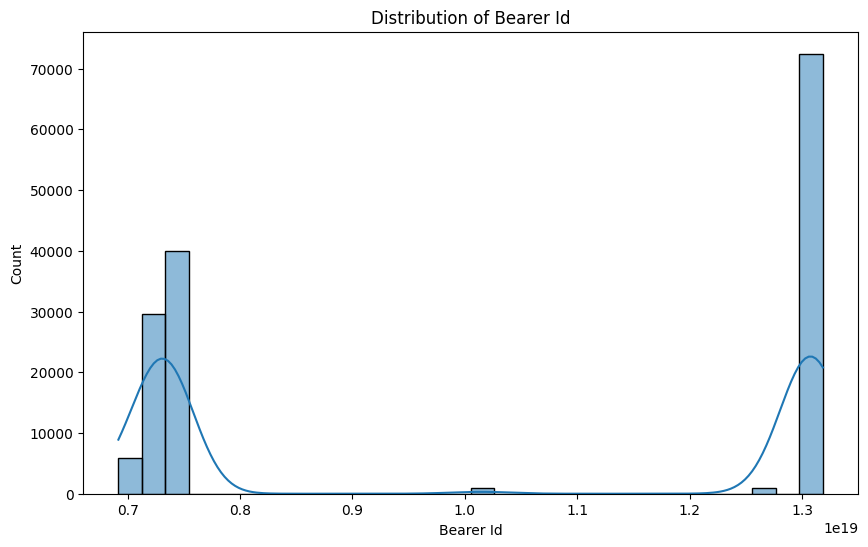

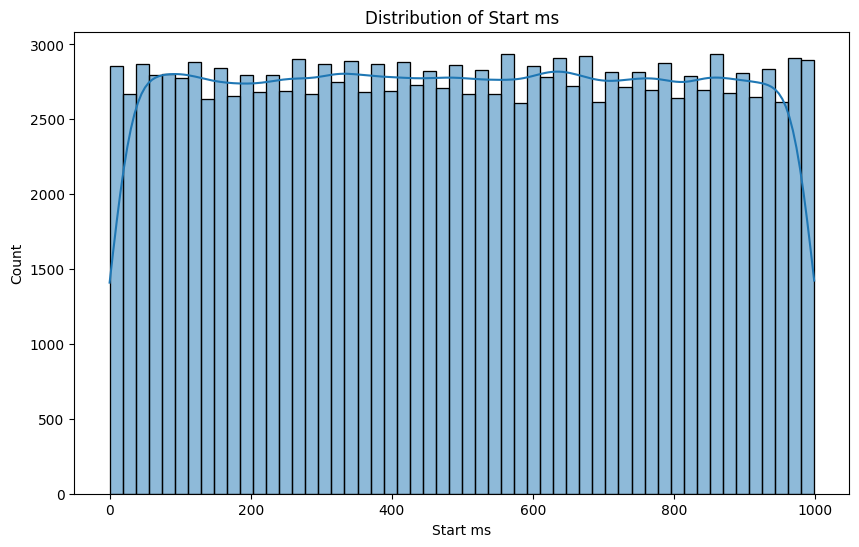

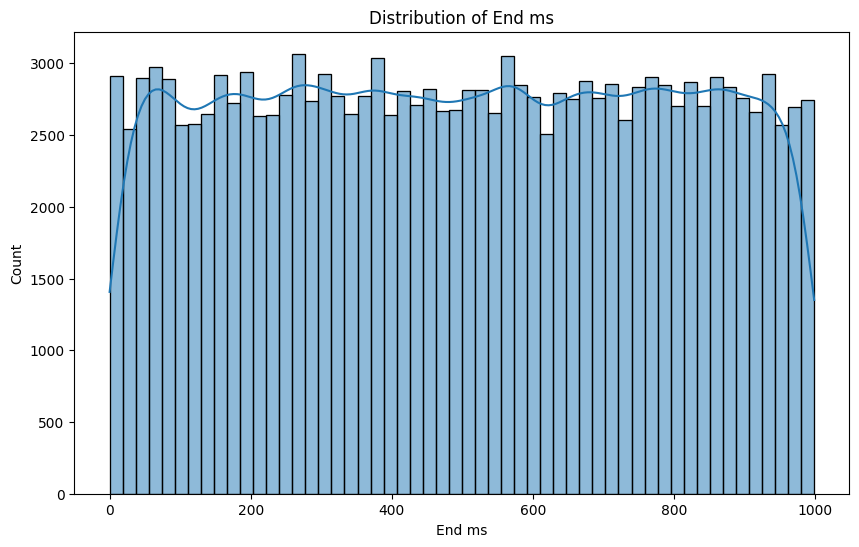

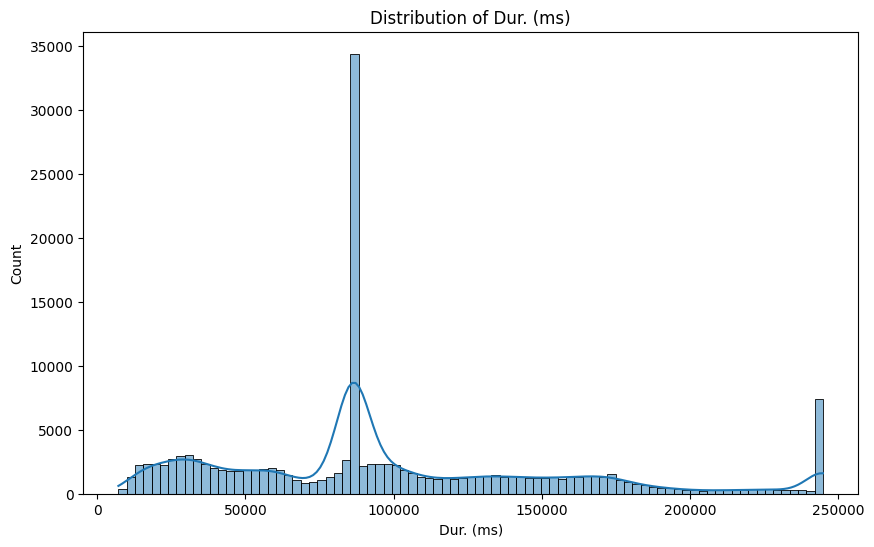

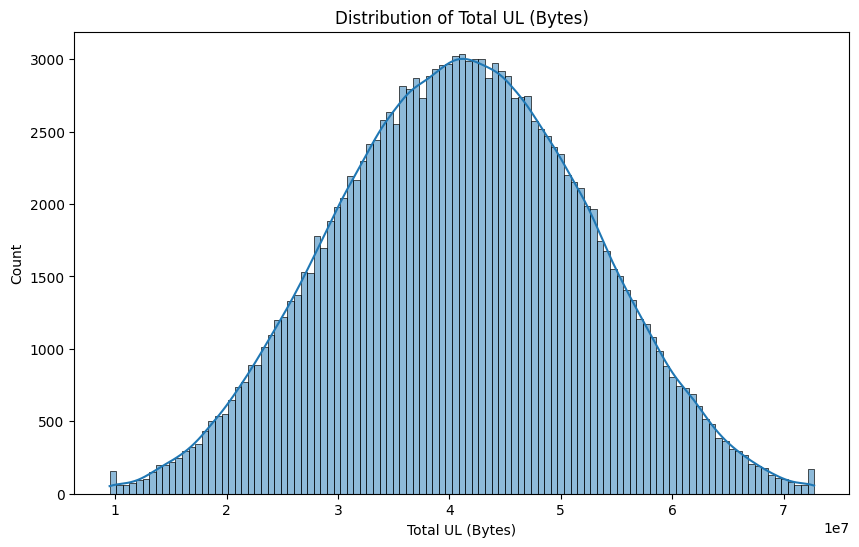

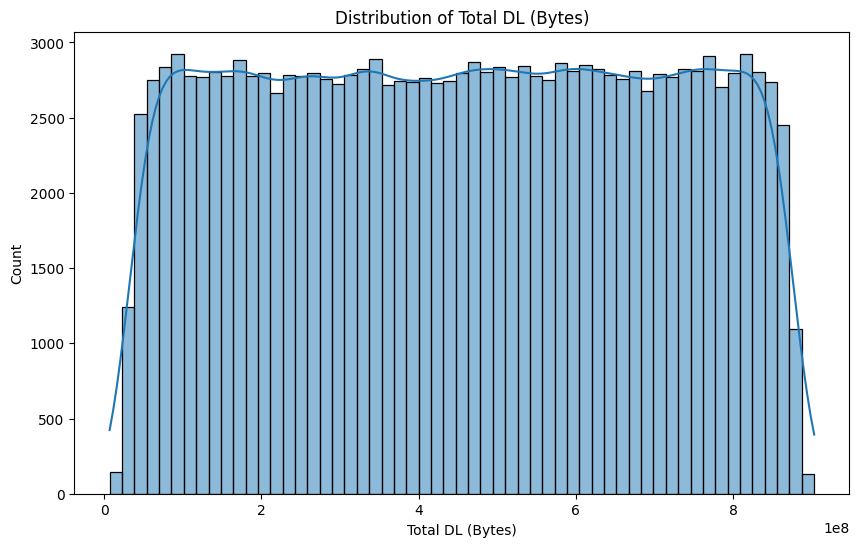

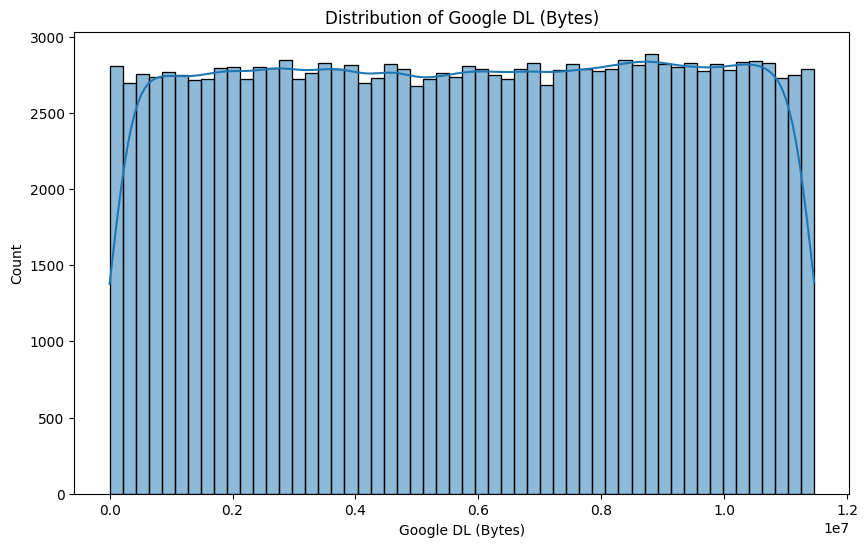

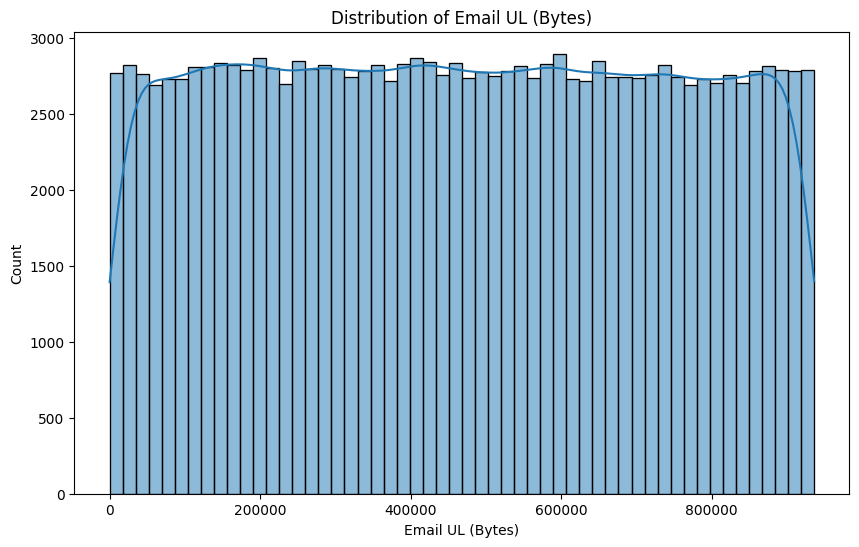

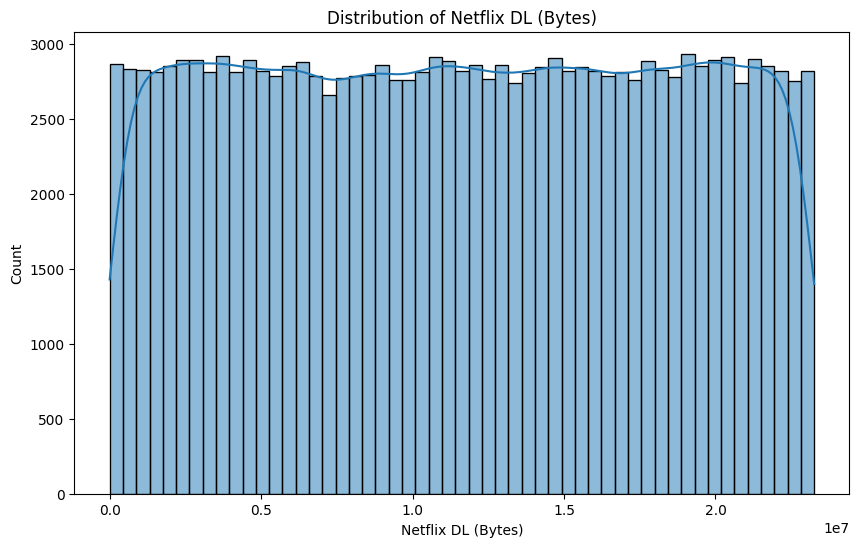

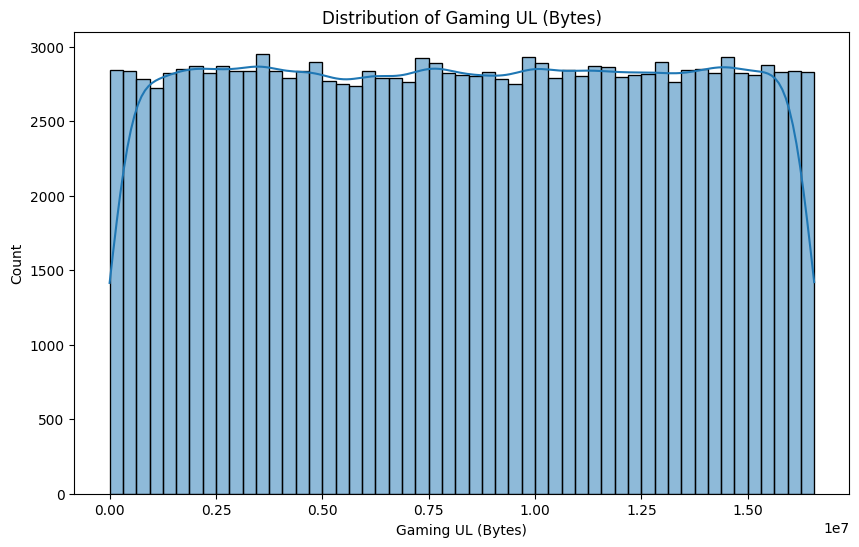

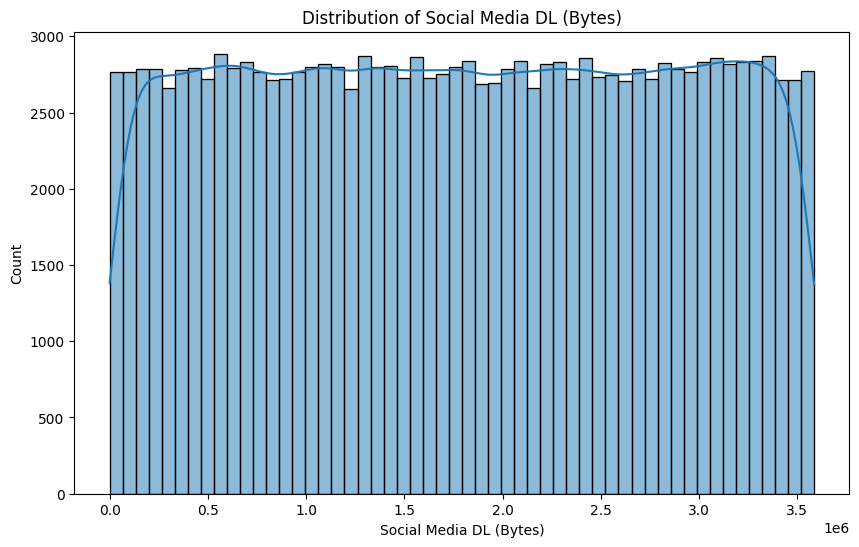

In [24]:
# 6. Graphical Univariate Analysis 
vars = ['Bearer Id','Start ms','End ms','Dur. (ms)', 'Total UL (Bytes)', 'Total DL (Bytes)', 'Google DL (Bytes)','Email UL (Bytes)','Netflix DL (Bytes)','Gaming UL (Bytes)','Social Media DL (Bytes)']
print("\nPlotting univariate analyses:")
for column in vars:  # Adjust the number of columns as needed
    plot_univariate(df, column) 

Bivariate Analysis – explore the relationship between each application & the
total DL+UL data using appropriate methods and interpret your result

d:\KIFIYA AIM\WEEK 2\Telecom-Growth-Analysis\venv1\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


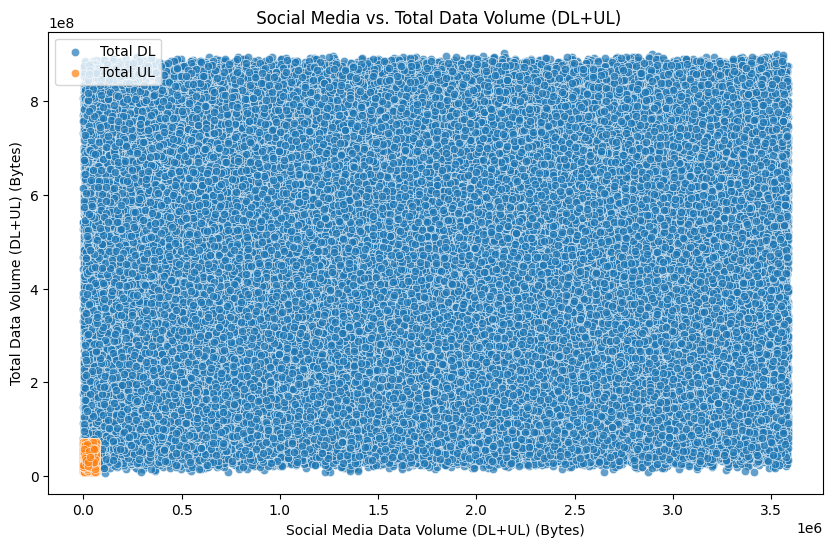

d:\KIFIYA AIM\WEEK 2\Telecom-Growth-Analysis\venv1\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


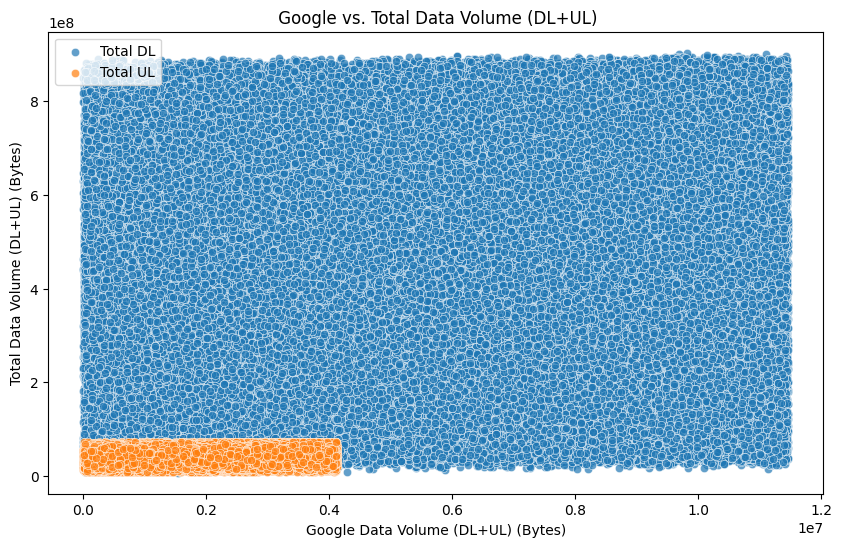

d:\KIFIYA AIM\WEEK 2\Telecom-Growth-Analysis\venv1\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


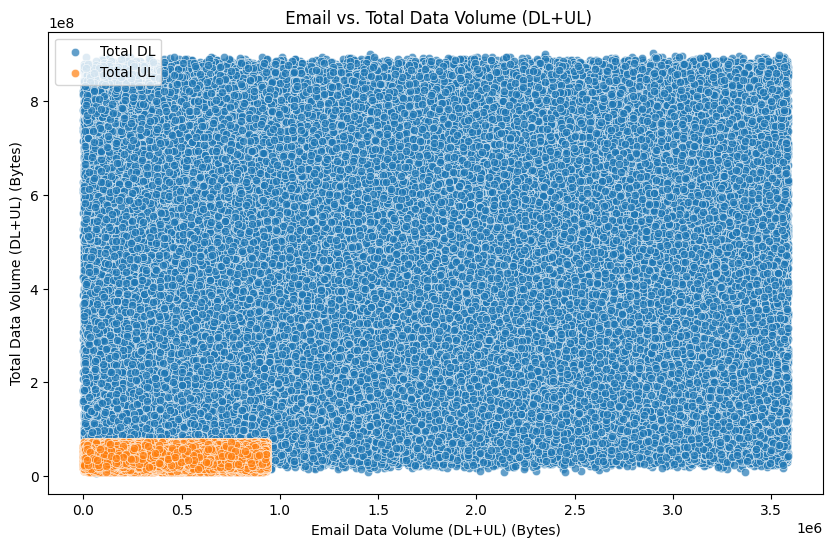

d:\KIFIYA AIM\WEEK 2\Telecom-Growth-Analysis\venv1\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


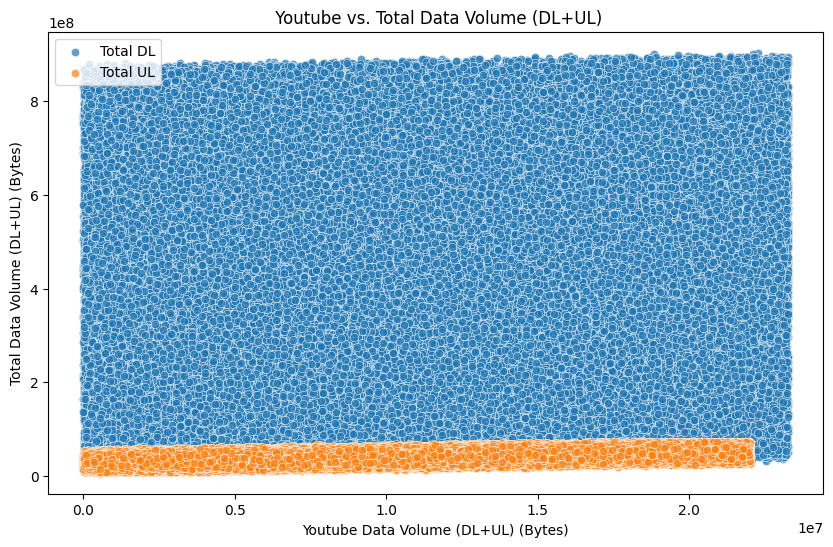

d:\KIFIYA AIM\WEEK 2\Telecom-Growth-Analysis\venv1\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


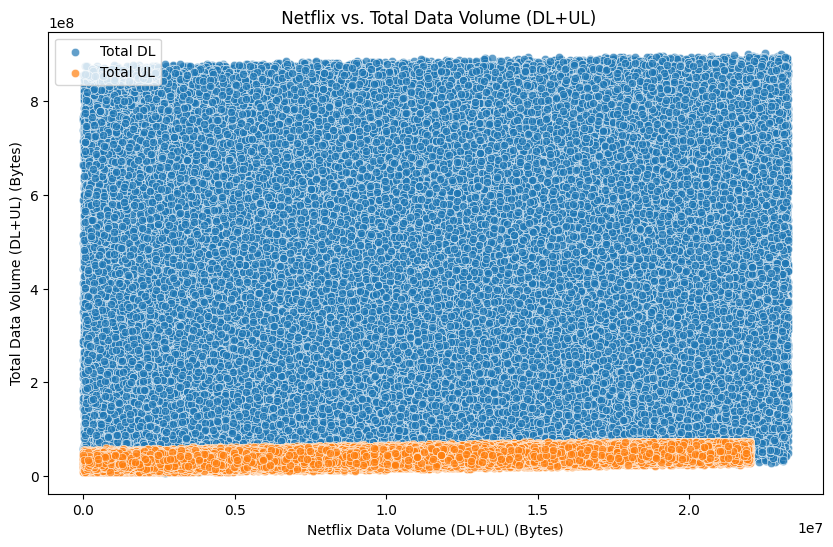

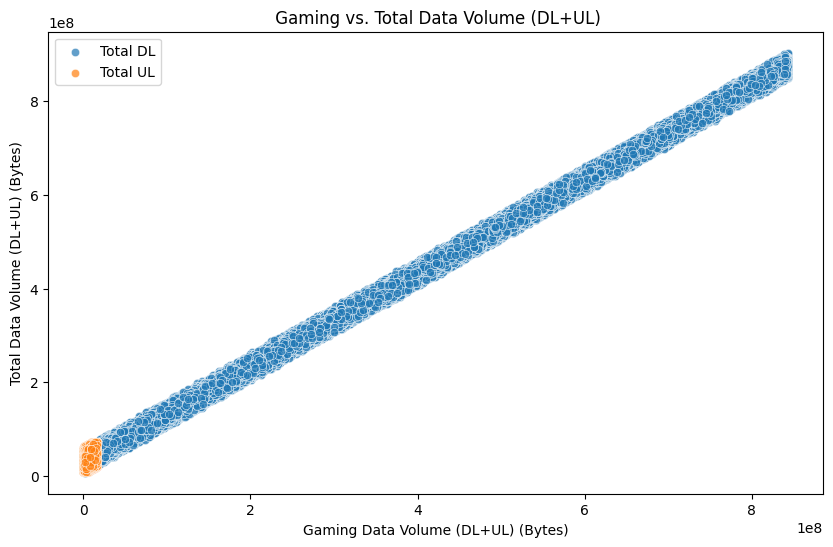

d:\KIFIYA AIM\WEEK 2\Telecom-Growth-Analysis\venv1\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


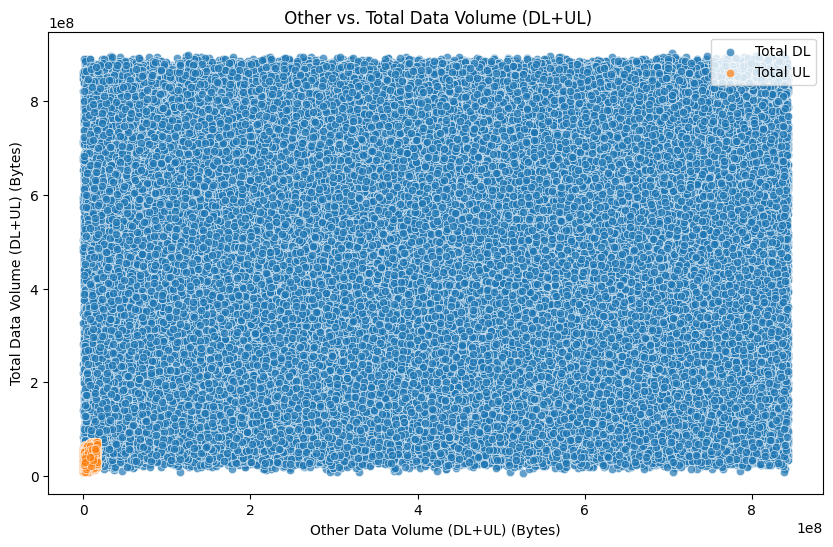

In [26]:
# Bivariate Analysis
apps = ['Social Media', 'Google', 'Email', 'Youtube', 'Netflix', 'Gaming', 'Other']
for app in apps:
    plt.figure(figsize=(10, 6))
    sns.scatterplot(x=app + ' DL (Bytes)', y='Total DL (Bytes)', data=df, label='Total DL', alpha=0.7)
    sns.scatterplot(x=app + ' UL (Bytes)', y='Total UL (Bytes)', data=df, label='Total UL', alpha=0.7)
    plt.title(f' {app} vs. Total Data Volume (DL+UL)')
    plt.xlabel(f'{app} Data Volume (DL+UL) (Bytes)')
    plt.ylabel('Total Data Volume (DL+UL) (Bytes)')
    plt.legend()
    plt.show()


Bivariate Analysis:
Correlations between applications and total data:
Social Media_data    0.999941
Google_data          0.999954
Email_data           0.999950
Youtube_data         0.999958
Netflix_data         0.999958
Gaming_data          0.999999
Other_data           0.999940
dtype: float64


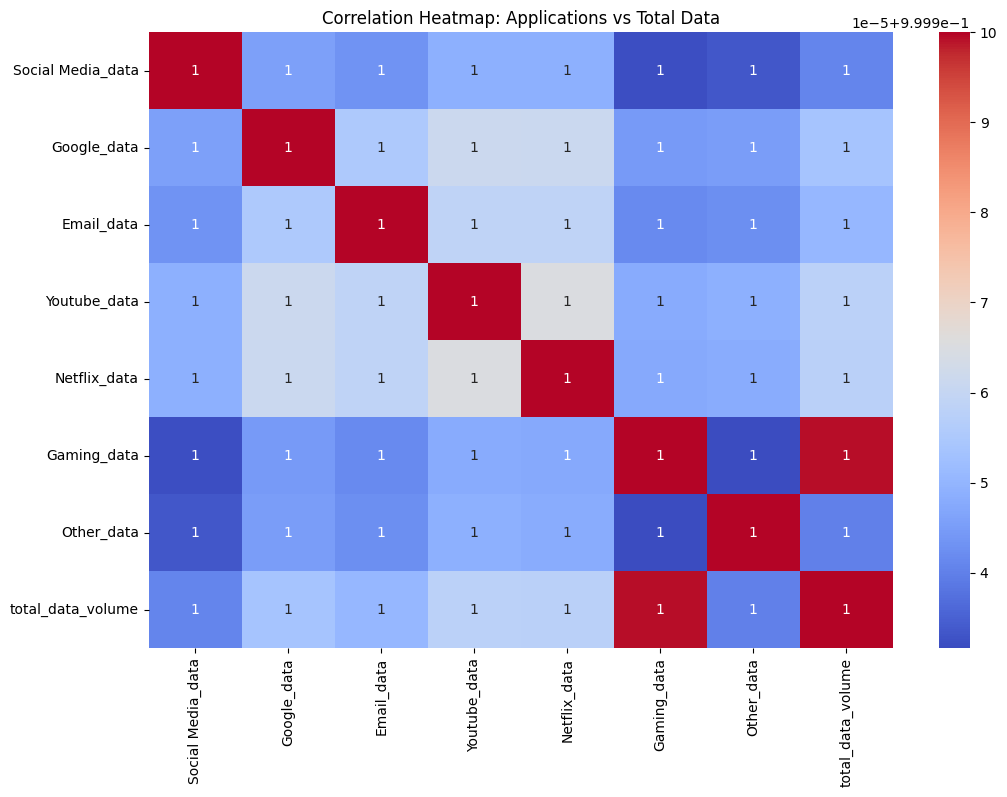

In [27]:
# Bivariate Analysis
print("\nBivariate Analysis:")
app_columns = ['Social Media_data', 'Google_data', 'Email_data', 'Youtube_data', 'Netflix_data', 'Gaming_data', 'Other_data']
total_data_column = 'total_data_volume'
app_correlations = bivariate_analysis(user_behavior, app_columns, total_data_column)
print("Correlations between applications and total data:")
print(app_correlations)

plt.figure(figsize=(12, 8))
sns.heatmap(user_behavior[app_columns + [total_data_column]].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap: Applications vs Total Data')
plt.show()

Correlation Analysis – compute a correlation matrix for the following
variables and interpret your findings: Social Media data, Google data, Email
data, YouTube data, Netflix data, Gaming data, and Other data

In [28]:
# total data for each category

df["Youtube_Total_Data"] = df["Youtube DL (Bytes)"] + df["Youtube UL (Bytes)"]
df["Google_Total_Data"] = df["Google DL (Bytes)"] + df["Google UL (Bytes)"]
df["Email_Total_Data"] = df["Email DL (Bytes)"] + df["Email UL (Bytes)"]
df["Social_Media_Total_Data"] = df["Social Media DL (Bytes)"] + df["Social Media UL (Bytes)"]
df["Netflix_Total_Data"] = df["Netflix DL (Bytes)"] + df["Netflix UL (Bytes)"]
df["Gaming_Total_Data"] = df["Gaming DL (Bytes)"] + df["Gaming UL (Bytes)"]
df["Other_Total_Data"] = df["Other DL (Bytes)"] + df["Other UL (Bytes)"]
df["Total_UL_and_DL"] = df["Total UL (Bytes)"] + df["Total DL (Bytes)"]

correlation matrix for the variables [ Social Media data, Google data, Email
data, YouTube data, Netflix data, Gaming data, and Other data]

In [29]:
# Correlation Analysis

df_corr = df[['Youtube_Total_Data', 'Google_Total_Data','Email_Total_Data', 'Social_Media_Total_Data',
              'Netflix_Total_Data','Gaming_Total_Data','Other_Total_Data']].corr()

df_corr

Youtube_Total_Data  Google_Total_Data  \
Youtube_Total_Data                 1.000000           0.002277   
Google_Total_Data                  0.002277           1.000000   
Email_Total_Data                  -0.002919          -0.000412   
Social_Media_Total_Data            0.000548          -0.001708   
Netflix_Total_Data                 0.002882          -0.001902   
Gaming_Total_Data                 -0.002999          -0.000994   
Other_Total_Data                   0.002969          -0.001727   

                         Email_Total_Data  Social_Media_Total_Data  \
Youtube_Total_Data              -0.002919                 0.000548   
Google_Total_Data               -0.000412                -0.001708   
Email_Total_Data                 1.000000                 0.004032   
Social_Media_Total_Data          0.004032                 1.000000   
Netflix_Total_Data               0.001029                 0.001013   
Gaming_Total_Data               -0.000644                 0.001082   
Other_Total_Data                -0.001299                 0.006065   

                         Netflix_Total_Data  Gaming_Total_Data  \
Youtube_Total_Data                 0.002882          -0.002999   
Google_Total_Data                 -0.001902          -0.000994   
Email_Total_Data                   0.001029          -0.000644   
Social_Media_Total_Data            0.001013           0.001082   
Netflix_Total_Data                 1.000000          -0.003109   
Gaming_Total_Data                 -0.003109           1.000000   
Other_Total_Data                  -0.009033          -0.002661   

                         Other_Total_Data  
Youtube_Total_Data               0.002969  
Google_Total_Data               -0.001727  
Email_Total_Data                -0.001299  
Social_Media_Total_Data          0.006065  
Netflix_Total_Data              -0.009033  
Gaming_Total_Data               -0.002661  
Other_Total_Data                 1.000000

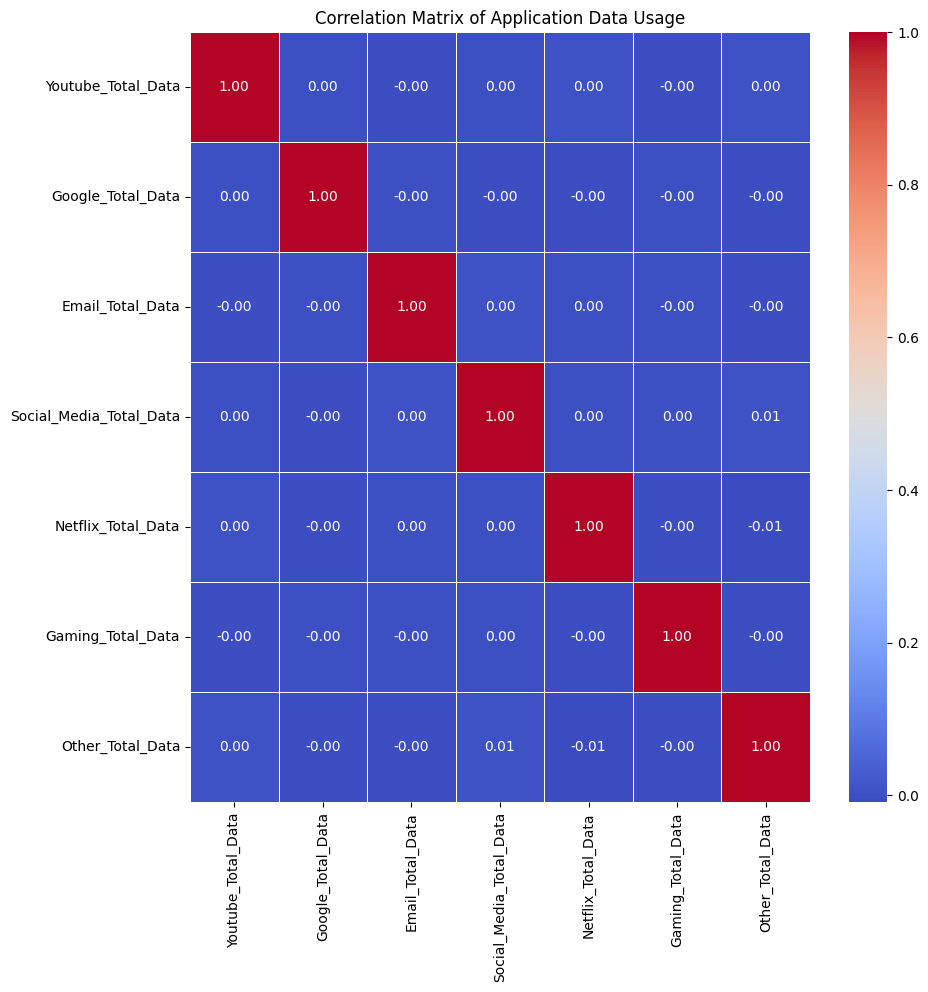

In [30]:
plt.figure(figsize=(10, 10))
sn.heatmap(df_corr, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix of Application Data Usage')
plt.show()

Dimensionality Reduction – perform a principal component analysis to
reduce the dimensions of your data and provide a useful interpretation of
the results (Provide your interpretation in four (4) bullet points maximum).

### Dimensionality Reduction – perform a principal component analysis

In [32]:
def perform_pca(df, n_components=2):
    """Perform PCA on the numeric columns of the DataFrame."""
    scaler = StandardScaler()
    
    # Select only numeric columns
    numeric_df = df.select_dtypes(include=['number'])
    
    # Scale the data
    scaled_data = scaler.fit_transform(numeric_df)
    
    # Apply PCA
    pca = PCA(n_components=n_components)
    pca_result = pca.fit_transform(scaled_data)
    
    # Create a DataFrame for principal components
    principal_df = pd.DataFrame(pca_result, columns=[f'PC{i+1}' for i in range(pca_result.shape[1])])
    
    # Get variance ratios
    variance_ratio = pca.explained_variance_ratio_
    cumulative_variance = variance_ratio.cumsum()
    
    return principal_df, variance_ratio, cumulative_variance

In [33]:
print(df.info())  # View column data types

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150001 entries, 0 to 150000
Data columns (total 63 columns):
 #   Column                                    Non-Null Count   Dtype  
---  ------                                    --------------   -----  
 0   Bearer Id                                 150001 non-null  float64
 1   Start                                     150000 non-null  object 
 2   Start ms                                  150001 non-null  float64
 3   End                                       150000 non-null  object 
 4   End ms                                    150001 non-null  float64
 5   Dur. (ms)                                 150001 non-null  float64
 6   IMSI                                      150001 non-null  float64
 7   MSISDN/Number                             150001 non-null  float64
 8   IMEI                                      150001 non-null  float64
 9   Last Location Name                        150001 non-null  object 
 10  Avg RTT DL (ms)     

In [35]:
# PCA Analysis 
principal_df, variance_ratio, cumulative_variance = perform_pca(df, n_components=15)
print(principal_df.head())
print("Explained variance ratio:", variance_ratio)
print("Cumulative variance ratio:", cumulative_variance)

        PC1       PC2       PC3       PC4       PC5       PC6       PC7  \
0  3.240742  0.951201 -1.219230 -1.022525 -1.267207  1.633665 -0.465119   
1  3.054094  1.102287  1.679516  2.982058  0.962628 -0.613808 -2.170861   
2  2.945399  1.236144 -1.536862 -0.050442  0.313666 -0.018990  1.734539   
3  3.027370  1.223225  3.190860  0.548707  2.045024 -2.546565  1.239317   
4  2.977435  1.228167  0.883963  0.201025  1.082671 -1.516857 -0.012363   

        PC8       PC9      PC10      PC11      PC12      PC13      PC14  \
0 -1.936452 -1.179968  2.726279 -0.435020 -0.852357  1.053527 -0.358811   
1  0.168841 -0.238525  2.849999  1.410540 -0.248081 -0.267827 -0.326196   
2 -1.162153 -0.528913  2.808350  2.779535  0.464429 -0.694331  0.887550   
3 -1.540080  0.670432  2.800831  0.462849  0.593262 -0.632940  0.534459   
4 -1.577169 -0.194905  2.802801  0.889933  0.473301  1.433030  0.742243   

       PC15  
0  0.699628  
1 -1.715896  
2  0.012117  
3 -0.295033  
4 -1.408777  
Explained vari

In [36]:
variance_ratio.sum()

np.float64(0.7441729853908523)

In [39]:
def plot_pca_results(variance_ratio, cumulative_variance):
    """Plot explained variance ratio and cumulative variance."""
    plt.figure(figsize=(10, 6))
    
    # Plot explained variance ratio
    plt.bar(range(1, len(variance_ratio) + 1), variance_ratio, alpha=0.6, label='Explained Variance Ratio')
    
    # Plot cumulative variance
    plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, marker='o', color='red', label='Cumulative Variance')
    
    # Add labels, title, and legend
    plt.xlabel('Principal Component')
    plt.ylabel('Variance Ratio')
    plt.title('Explained and Cumulative Variance by PCA')
    plt.legend(loc='best')
    plt.grid(True)
    plt.show()

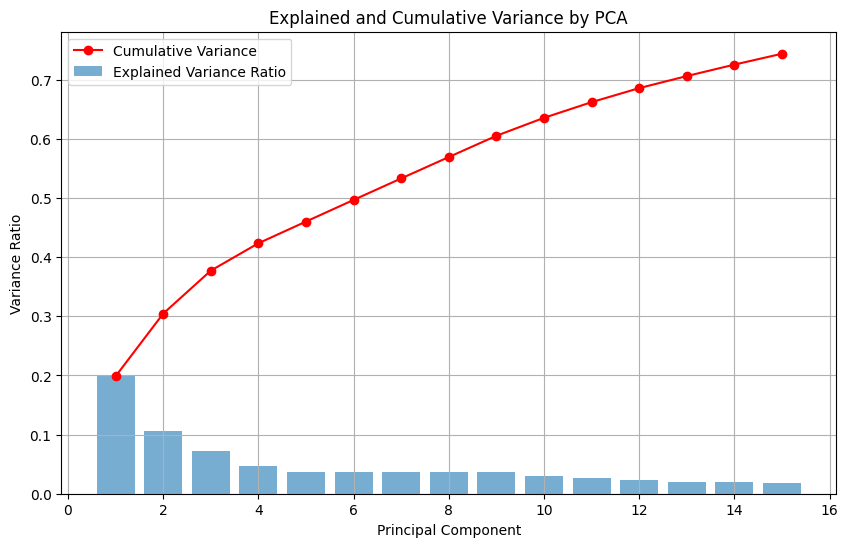

In [40]:
plot_pca_results(variance_ratio, cumulative_variance)

In [42]:
def plot_pca_2d(principal_df, labels=None):
    """Plot the first two principal components in 2D."""
    plt.figure(figsize=(8, 6))
    
    # Scatter plot of the first two principal components
    plt.scatter(principal_df['PC1'], principal_df['PC2'], c=labels, cmap='viridis', alpha=0.6)
    
    # Add labels and title
    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')
    plt.title('2D PCA Plot')
    plt.colorbar(label='Label' if labels is not None else None)
    plt.grid(True)
    plt.show()

C:\Users\25191\AppData\Local\Temp\ipykernel_9544\1725425093.py:6: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(principal_df['PC1'], principal_df['PC2'], c=labels, cmap='viridis', alpha=0.6)


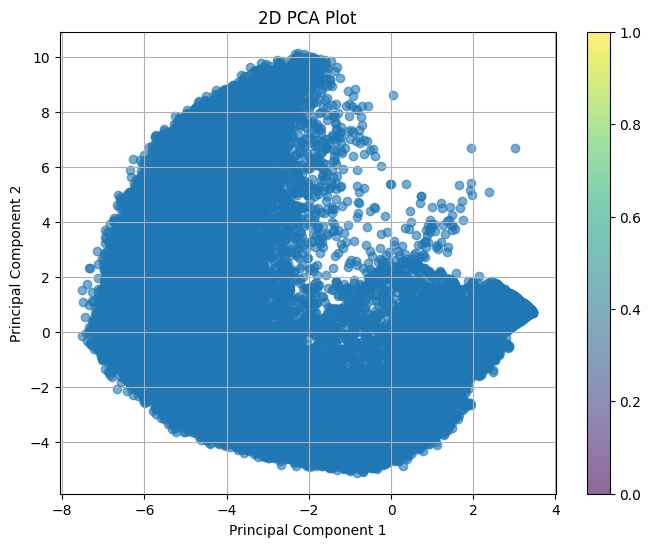

In [43]:
plot_pca_2d(principal_df)